# 1. colasificación de solicitantes de credito con Naive Bayes

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
solicitantes = pd.read_excel('/content/drive/MyDrive/Análisis de datos /0. SolicitantesCrédito.xlsx')

In [37]:
solicitantes.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

### 2. Limpieza de los datos

In [38]:
solicitantes.shape

(8378, 35)

In [39]:
## Eliminos las filas donde "PreApr" se encuentran vacias
XD = solicitantes.dropna(subset=['PreApr'])

In [40]:
XD.shape

(5842, 35)

Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto(EAD), Plazo y Cuota.


In [41]:
## ESCOJO LAS VARIABLE INDEPENDIENTES
XD = XD[['Edad' , 'Hijos' , 'Perscargo' , 'Estrato' , 'Ingresos' , 'Egresos' , 'Monto (EAD)' , 'Plazo' , 'Cuota (COP)']]

In [42]:
## ESCOJO LAS VARIABLE DEPENDIENTE
yd = solicitantes['PreApr'].dropna()

### 3. Modelo Naives Bayes

In [44]:
## Importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [45]:
## convertir datos a arrays (arreglos)
XDArray = np.array(XD , dtype=float)
ydArray = np.array(yd , dtype=float)

In [46]:
## Entreno el modelo
modeloNB = GaussianNB()
modeloNB.fit(XDArray , ydArray)

GaussianNB()

In [47]:
## Genero las predicciones
ydpred = modeloNB.predict(XDArray)

### 4. Matriz de confusió

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
cm = confusion_matrix(yd , ydpred)
cm

array([[2539,  420],
       [1041, 1842]])

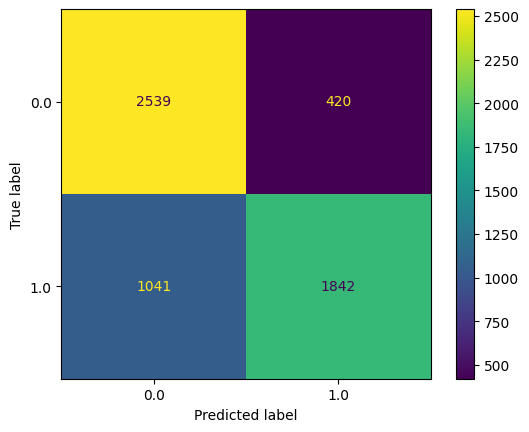

In [50]:
disp = ConfusionMatrixDisplay(cm, display_labels=modeloNB.classes_)
disp.plot()
plt.show()

In [51]:
## Extraigo los valores de la matriz de confusión
VN = cm[0,0] ; FP = cm[0,1] ; FN = cm[1,0] ; VP = cm[1,1]

In [52]:
## Exactitud
exactitud = (VP + VN) / cm.sum()

## Error
error = (FP + FN) / cm.sum()

## Precisión
precision = VP / (FP + VP)

## Sencibolidad
sencibilidad = VP / (VP + FN)

## Especificidad
especificidad = VN / (FP + VN)


In [53]:
## Imprimo los mensajes
print(f'La exactitud del modelo es: {exactitud:.2%}')
print(f'El error del modelo es: {error:.2%}')
print(f'La precisión del modelo es: {precision:.2%}')
print(f'La sensibilidad del modelo es: {sencibilidad:.2%}')
print(f'La especificidad del modelo es: {especificidad:.2%}')

La exactitud del modelo es: 74.99%
El error del modelo es: 25.01%
La precisión del modelo es: 81.43%
La sensibilidad del modelo es: 63.89%
La especificidad del modelo es: 85.81%


### 5. pronostico de Preaprovacion para solicitantes nuevos

In [54]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [55]:
## Reduzco las columnas solo a las necesarias
XDGener = XDGener[['Edad' , 'Hijos' , 'Perscargo' , 'Estrato' , 'Ingresos' , 'Egresos' , 'Monto (EAD)' , 'Plazo' , 'Cuota (COP)']]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [56]:
## Solicito al modelo que haga el pronostico para los solicitantes sin clasificacion
ydGener = modeloNB.predict(XDGener)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [57]:
## Creo una serie, que si puede contener indices
ydGenerSerie = pd.Series(ydGener ,
                         index = solicitantes[solicitantes['PreApr'].isna()].index)

In [58]:
## Completo los valores de PreApr que no existian antes:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

/tmp/ipython-input-3319464973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [59]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [60]:
## Exporto la base de datos completa a excel, en la carpeta content
solicitantes.to_excel('SolicitantesCompleta.xlsx')

Al incluir las nueve variables socioeconómicas, el modelo Naive Bayes mejora su capacidad para identificar solicitantes aptos para crédito, porque tiene más información sobre cada solicitante; especialmente en términos de sensibilidad,la exactitud aumenta y el error disminuye, ya que el modelo puede tomar decisiones más acertadas en general.
La sensibilidad mejora, lo que indica que el modelo identifica mejor a las personas que sí pueden pagar el crédito. Sin embargo, la precisión y la especificidad pueden bajar un poco, porque al aprobar a más solicitantes también se asume un mayor riesgo.
En general, el modelo mejora, aunque se vuelve un poco menos estricto en algunas decisiones.